In [ ]:
# Import libraries (no need to install anything)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [ ]:
import os
os.listdir()



['.config', 'sample_data']

In [17]:
import os
os.listdir()



['.config', 'sample_data', 'True.csv', 'Fake.csv']

In [18]:
# Load data
fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

# Add labels
fake['label'] = 0  # 0 = Fake
real['label'] = 1  # 1 = Real

# Combine datasets
df = pd.concat([fake, real])
df = df[['text', 'label']]

df.head()


,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split into features and labels
X = df['text']
y = df['label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔍 Accuracy: 0.9846325167037862

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4733
           1       0.98      0.99      0.98      4247

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980


🧱 Confusion Matrix:
 [[4658   75]
 [  63 4184]]


In [21]:
def predict_news(text):
    text_tfidf = vectorizer.transform([text])
    prediction = model.predict(text_tfidf)[0]
    if prediction == 0:
        return "Fake News"
    else:
        return "Real News"

# Example usage:
sample_news = "NASA announces new discovery on Mars"
print(predict_news(sample_news))


Fake News


In [24]:
def predict_news(text):
    text_tfidf = vectorizer.transform([text])
    prediction = model.predict(text_tfidf)[0]
    if prediction == 0:
        return "Fake News"
    else:
        return "Real News"

sample_news = "The government announces a new healthcare policy to improve public hospitals."
print(predict_news(sample_news))

Real News


In [22]:
!pip install flask
!pip install pyngrok


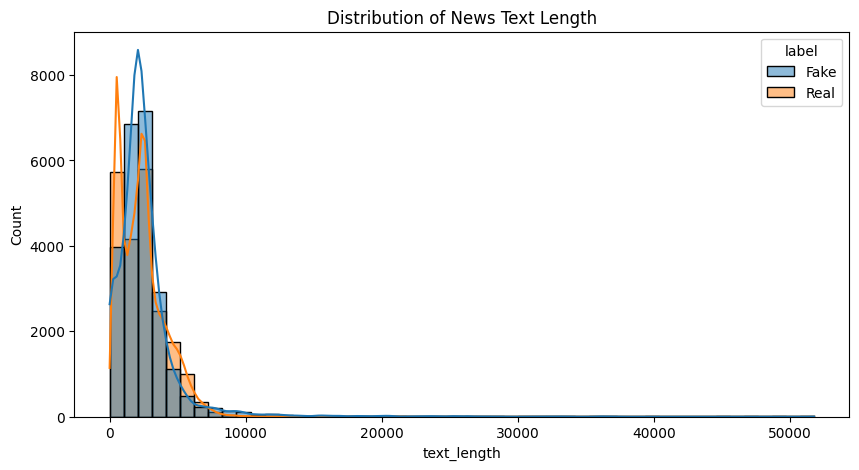

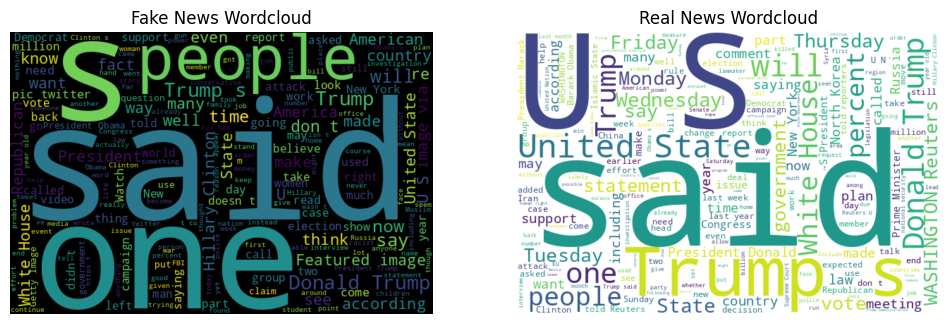

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Load data
fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

# Add label columns
fake['label'] = 'Fake'
real['label'] = 'Real'

# Combine datasets
df = pd.concat([fake, real])

# Add a column with text length
df['text_length'] = df['text'].apply(len)

# Plot text length distribution
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True)
plt.title('Distribution of News Text Length')
plt.show()

# Generate wordclouds for fake and real news
fake_text = " ".join(fake['text'].tolist())
real_text = " ".join(real['text'].tolist())

wordcloud_fake = WordCloud(width=600, height=400, background_color='black').generate(fake_text)
wordcloud_real = WordCloud(width=600, height=400, background_color='white').generate(real_text)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Wordcloud')

plt.subplot(1,2,2)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Real News Wordcloud')

plt.show()
